# Project: Investigate a Gapminder World Datasets 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Gapminder is an independent educational non-proﬁt ﬁghting global misconceptions. Gapminder is a non-profit venture registered in Stockholm, Sweden, that promotes sustainable global development and achievement of the United Nations Millennium Development Goals by increased use and understanding of statistics and other information about social, economic, and environmental development at local, national, and global levels.

In their [wesite](https://www.gapminder.org/data/), There are a varity of datasets you can choose, I choose three datasets:
* Babies per woman (total fertility)
* Income per person
* Life expectancy

to answer some questions :
* How life expectancy change over years ?
* How life expectancy change over regions ?
* does income per person impact life expectancy in general ? and how ?
* does income per person impact life expectancy over countries ? and how ?
* does total fertility behave like life expectancy ?

In [1]:
# Import statements for all of the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Now, first step to do here is to load data and check its cleanliness.

### Loading data

In [2]:
# load life expectancy dataset
df_le = pd.read_csv ('life_expectancy_years.csv')
# load total fertility dataset
df_tf = pd.read_csv ('children_per_woman_total_fertility.csv')
# load total income per person dataset
df_tipp = pd.read_csv ('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

Next step is to check each dataset.

### Check each dataset

#### Check info

In [3]:
# load some information of each dataset
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [4]:
# load some information of each dataset
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 476.7+ KB


In [5]:
# load some information of each dataset
df_tipp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(101), object(151)
memory usage: 384.0+ KB


Now, we have 2 problems:

First problem I've found that datasets' indecies is not aligned  with each other. And same go for columns.\
Second problem I've found that total income per person dataset dtypes have some objects.

We will solve these 2 problems in cleaning data phase. But first, we also need to check if there is some NaN values

#### Check NaN values

In [6]:
# check NaN rows for each dataset
df_le[df_le.isnull().any(axis=1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,St. Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,Marshall Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# check NaN rows for each dataset
df_tf[df_tf.isnull().any(axis=1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
73,Greenland,4.9,4.89,4.88,4.87,4.86,4.84,4.83,4.82,4.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# check NaN rows for each dataset
df_tipp[df_tipp.isnull().any(axis=1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050


#### Check duplicated rows

In [9]:
#check duplicates for each dataset
df_le.duplicated().sum()

0

In [10]:
#check duplicates for each dataset
df_tf.duplicated().sum()

0

In [11]:
#check duplicates for each dataset
df_tipp.duplicated().sum()

0

Now that we defined our datasets' issues and checked our Nan, duplicated rows, let's clean our data

### Data Cleaning

#### Cleaning NaN values

In [12]:
# First, let's drop nan rows
df_le.dropna( axis=0, how='any', inplace=True)
df_tf.dropna( axis=0, how='any', inplace=True)
# reset indicies for each
df_le.reset_index(drop=True, inplace=True)
df_tf.reset_index(drop=True, inplace=True)

In [13]:
# Check NaN values for each dataset
df_le[df_le.isnull().any(axis=1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100


In [14]:
# Check NaN values for each dataset
df_tf[df_tf.isnull().any(axis=1)]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100


\
After clearing NaN rows, the turn is for the two issues we addressed in the pervious section. First, let's recheck our information about each dataset.

#### Solving first problem

In [15]:
# check informations of each dataset
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 439.0+ KB


In [16]:
# check informations of each dataset
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 474.4+ KB


In [17]:
# check informations of each dataset
df_tipp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(101), object(151)
memory usage: 384.0+ KB


\
Let's start by removing the extra columns from the total fertility and life expectancy datasets since total income dataset has only data to year 2050.

In [18]:
# Removing the extra columns from life expectancy datasets
df_le.drop(df_le.loc[:, '2051':].columns, inplace=True, axis=1)
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Columns: 252 entries, country to 2050
dtypes: float64(251), object(1)
memory usage: 366.3+ KB


In [19]:
# Removing the extra columns from total fertility datasets
df_tf.drop(df_tf.loc[:, '2051':].columns, inplace=True, axis=1)
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 252 entries, country to 2050
dtypes: float64(251), object(1)
memory usage: 395.8+ KB


\
We will now remove the extra rows from the other datasets to match the least range index dataset which is life expectancy dataset

In [20]:
# Remove the extra rows from total fertility dataset
df_tf = df_tf[df_tf['country'].isin(df_le['country'])]
df_tf.reset_index(drop=True, inplace=True)
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Columns: 252 entries, country to 2050
dtypes: float64(251), object(1)
memory usage: 366.3+ KB


In [21]:
# Remove the extra rows from total income per person dataset
df_tipp = df_tipp[df_tipp['country'].isin(df_le['country'])]
df_tipp.reset_index(drop=True, inplace=True)
df_tipp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Columns: 252 entries, country to 2050
dtypes: int64(101), object(151)
memory usage: 366.3+ KB


Finally, we will turn all columns dtypes in total income per person dataset to float

#### solving second problem

In [22]:
#iterate over columns to turn strings to floats
for column in df_tipp.columns[1:]:
    df_tipp[column] = df_tipp[column].replace({'k': '*1e3'}, regex=True).map(pd.eval).astype(float)
df_tipp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Columns: 252 entries, country to 2050
dtypes: float64(251), object(1)
memory usage: 366.3+ KB


### Organizing and merging datasets

After cleaning our data, we need to organize our data and merge it to the recoomended shape as stated in **Investigate a Dataset - Data Set Options**
> You will want to look into ways of reshaping your data so that it is tidy, especially if you want to do comparisons across indicators. After joining your data together, your columns might look like: {Country, Year, Indicator 1 Value,Indicator 2 Value, … }

So first we need to reshape the datasets

#### Reshaping datasets

In [23]:
pd.reset_option
#Reshaping life expectancy dataset
df_le = pd.melt(df_le, id_vars =['country'], var_name="year", value_vars =df_le.columns[1:], value_name= "life_expectancy")
df_le

,country,year,life_expectancy
0,Afghanistan,1800,28.2
1,Angola,1800,27.0
2,Albania,1800,35.4
3,United Arab Emirates,1800,30.7
4,Argentina,1800,33.2
...,...,...,...
46681,Samoa,2050,74.3
46682,Yemen,2050,72.2
46683,South Africa,2050,70.9
46684,Zambia,2050,69.8


In [24]:
#Reshaping total fertility dataset
df_tf = pd.melt(df_tf, id_vars =['country'], var_name="year", value_vars =df_tf.columns[1:], value_name= "total_fertility")
df_tf

,country,year,total_fertility
0,Afghanistan,1800,7.00
1,Angola,1800,6.93
2,Albania,1800,4.60
3,United Arab Emirates,1800,6.94
4,Argentina,1800,6.80
...,...,...,...
46681,Samoa,2050,2.81
46682,Yemen,2050,2.11
46683,South Africa,2050,1.91
46684,Zambia,2050,3.48


In [25]:
#Reshaping total income per person dataset
df_tipp = pd.melt(df_tipp, id_vars =['country'], var_name="year", value_vars =df_tipp.columns[1:], value_name= "total__income_per_person")
df_tipp

,country,year,total__income_per_person
0,Afghanistan,1800,683.0
1,Angola,1800,700.0
2,Albania,1800,755.0
3,United Arab Emirates,1800,1130.0
4,Argentina,1800,1730.0
...,...,...,...
46681,Samoa,2050,10700.0
46682,Yemen,2050,4540.0
46683,South Africa,2050,19700.0
46684,Zambia,2050,5680.0


#### merge three datasets

In [26]:
#merge three datasets
df = pd.merge(df_le, df_tf, on = ['country', 'year'])
df = pd.merge(df, df_tipp, on = ['country', 'year'])
df

,country,year,life_expectancy,total_fertility,total__income_per_person
0,Afghanistan,1800,28.2,7.00,683.0
1,Angola,1800,27.0,6.93,700.0
2,Albania,1800,35.4,4.60,755.0
3,United Arab Emirates,1800,30.7,6.94,1130.0
4,Argentina,1800,33.2,6.80,1730.0
...,...,...,...,...,...
46681,Samoa,2050,74.3,2.81,10700.0
46682,Yemen,2050,72.2,2.11,4540.0
46683,South Africa,2050,70.9,1.91,19700.0
46684,Zambia,2050,69.8,3.48,5680.0


<a id='eda'></a>
## Exploratory Data Analysis


### How life expectancy change over years ?

to answer this question we need to get the mean life expectancy for each year then create a line plot to visualize the answer

In [27]:
# Get the mean life expectancy for each year
le_year = df.groupby('year').mean()['life_expectancy']

C:\Users\Ahmed Aref\AppData\Local\Temp\ipykernel_1224\665340141.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  le_year = df.groupby('year').mean()['life_expectancy']


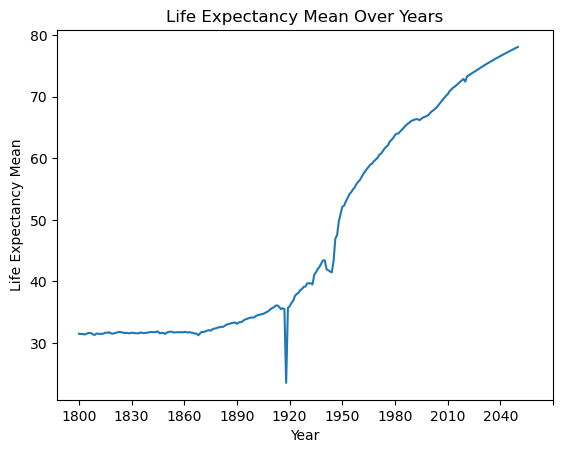

In [28]:
#let's visualize our answer as line plot
plt.plot(le_year)
plt.xticks(np.arange(0, 300, 30))
plt.title("Life Expectancy Mean Over Years")
plt.xlabel("Year")
plt.ylabel("Life Expectancy Mean");

This visualization show very clearly that Life expectancy was almost constant in 19th century until before 1920 it hit a sudden drop may be because of world war but after 1950 it start to increase rapidly until now

### How life expectancy change over regions ?

to answer this question we need first to install library to create a column contain the continent of each country

In [29]:
#install the library
!pip install pycountry_convert

In [30]:
#create function that use the library functions and methods to extract the continent name from the corresponding country
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "None"
#create the column containg the corresponding continent name
df['continent'] = df['country'].apply(country_to_continent)
df

,country,year,life_expectancy,total_fertility,total__income_per_person,continent
0,Afghanistan,1800,28.2,7.00,683.0,None
1,Angola,1800,27.0,6.93,700.0,None
2,Albania,1800,35.4,4.60,755.0,None
3,United Arab Emirates,1800,30.7,6.94,1130.0,None
4,Argentina,1800,33.2,6.80,1730.0,None
...,...,...,...,...,...,...
46681,Samoa,2050,74.3,2.81,10700.0,None
46682,Yemen,2050,72.2,2.11,4540.0,None
46683,South Africa,2050,70.9,1.91,19700.0,None
46684,Zambia,2050,69.8,3.48,5680.0,None


Now we can answer our question

In [31]:
# Get the mean life expectancy for each continent
le_continent = df.groupby('continent').mean()['life_expectancy']
le_continent

C:\Users\Ahmed Aref\AppData\Local\Temp\ipykernel_1224\4271403704.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  le_continent = df.groupby('continent').mean()['life_expectancy']


continent
None    47.570328
Name: life_expectancy, dtype: float64

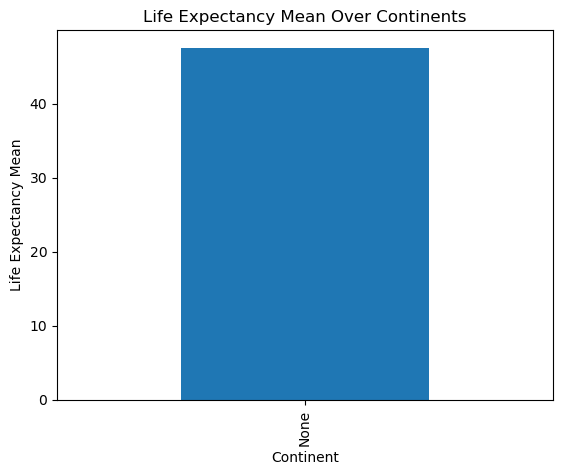

In [32]:
#let's visualize our answer as bar plot
le_continent.plot(kind='bar')
plt.title("Life Expectancy Mean Over Continents")
plt.xlabel("Continent")
plt.ylabel("Life Expectancy Mean");

The difference in life expectancy across regions is around 10 years which is not that big compared to over years

### does income per person impact life expectancy in general ? and how ?

to answer this question we will construct a scatter plot

<AxesSubplot: xlabel='total__income_per_person', ylabel='life_expectancy'>

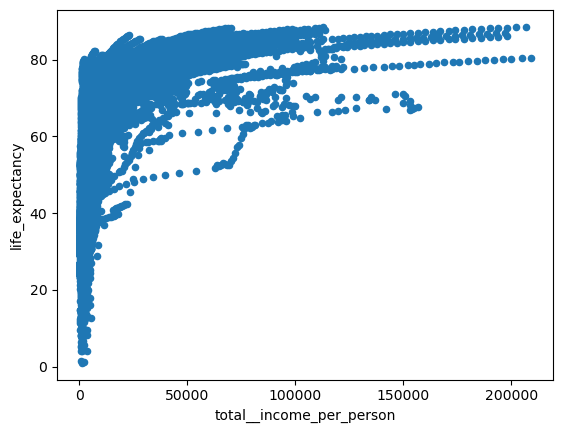

In [33]:
df.plot(x='total__income_per_person',y='life_expectancy',kind = 'scatter')

although the plot seem a little messy, But it make sense. The plot show that at higher total income per person there is a very high
life expectancy with no space for any low life expectancy. but even at low total income per person life expectancy can still be high
even more than higher life expectancy

### does income per person impact life expectancy over countris ? and how ?

To get more clear results this time, we will need to foucs on one year only which will be 2022, This will be a good indicatin if total income per person has a more clear relation with life expectancy or not

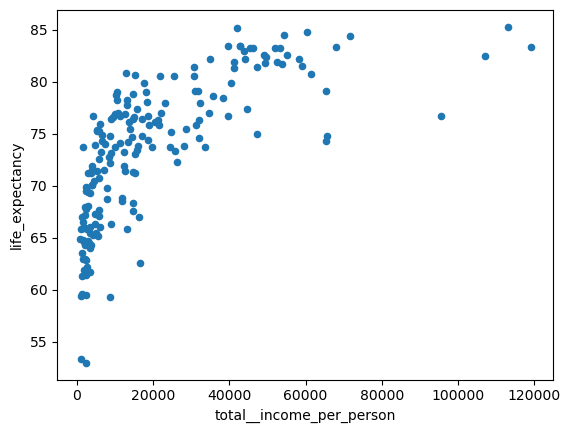

In [34]:
#filter dataset to get the rows with year 2022
df_f = df.query('year == "2022"')
#create scatter plot
df_f.plot(x='total__income_per_person',y='life_expectancy',kind = 'scatter');

Even after selecting one year, the pattern still like the previous one. the relation between the two parameters will be the same regardless 
of the time

### does total fertility behave like life expectancy ?

here we will make line plot like what we did for life expectancy to compare between them as they both concern the human existance

In [35]:
# Get the mean life expectancy for each year
tf_year = df.groupby('year').mean()['total_fertility']

C:\Users\Ahmed Aref\AppData\Local\Temp\ipykernel_1224\1242792229.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tf_year = df.groupby('year').mean()['total_fertility']


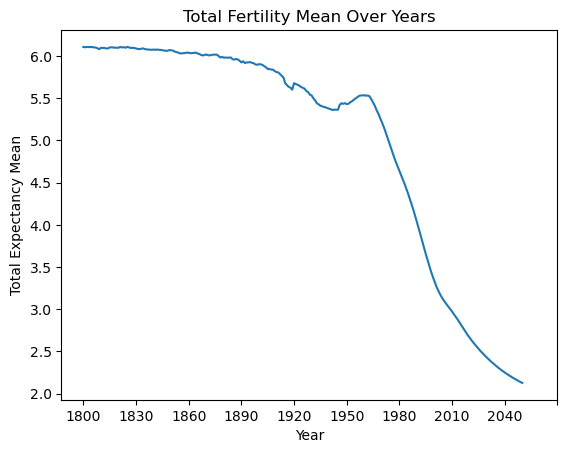

In [36]:
#visualize the answer as line plot
plt.plot(tf_year)
plt.xticks(np.arange(0, 300, 30))
plt.title("Total Fertility Mean Over Years")
plt.xlabel("Year")
plt.ylabel("Total Expectancy Mean");

it's really surpising that is typically ths opposite of life expectancy. We need to check the colerration

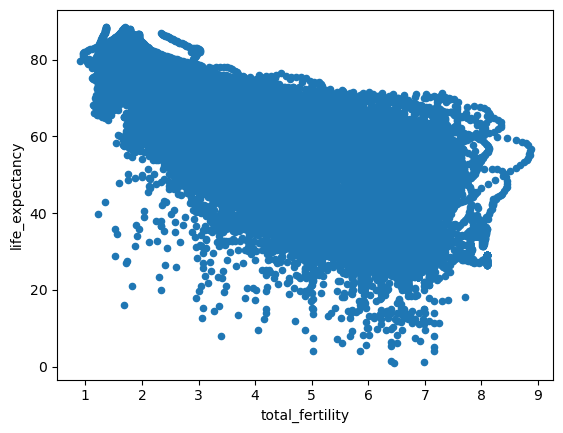

In [37]:
#check colerration between life expectancy and total fertility
df.plot(x='total_fertility',y='life_expectancy',kind = 'scatter');

the colerration isn't strong but it has tendacy toward a negative colerration which seem somehow logical when we return to the previous chart

Lastly, for full comparison between total fertility and life expectancy let's chart the total fertility across continents

C:\Users\Ahmed Aref\AppData\Local\Temp\ipykernel_1224\4266102634.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tf_continent = df.groupby('continent').mean()['total_fertility']


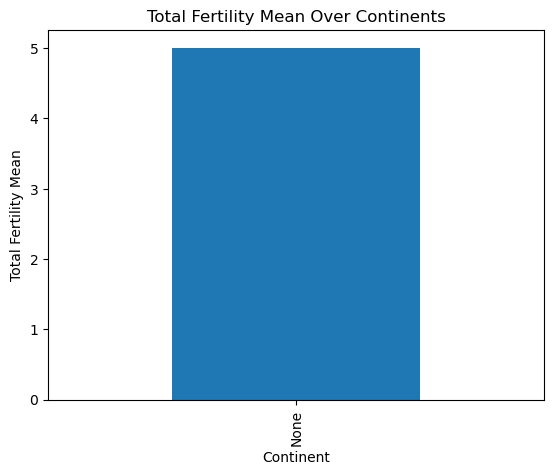

In [38]:
# get mean total fertility for each continent
tf_continent = df.groupby('continent').mean()['total_fertility']
#let's visualize our answer as bar plot
tf_continent.plot(kind='bar')
plt.title("Total Fertility Mean Over Continents")
plt.xlabel("Continent")
plt.ylabel("Total Fertility Mean");

Here something to consider, for life expectancy Europe has more than 10 years than africa. but now in total fertility chart Africa has 2.5 more fertility than europe

<a id='conclusions'></a>
## Conclusions



Now, we can conclude what we have reached to some points :
1) life expectancy has improved with years passing except wars time
2) life expectancy doesn't change drastically across continents expect difference between europe and africa
3) total income per person when it is only high, life expectancy will aslo high but when total income per person decrease life expectancy can increase or decrease
4) same way go for total income per person across countries
5) total fertility behave like the opposite of life expectancy especially for line plots

some limitations :
pycountry is a very useful tool and it helped me but it didn't sort all countries which lead to a less accurate answer